# Лабораторная №1

1. Реалезуйте градиентный спуск с постоянным шагом (learning rate). Иследовать сходимость при различных значениях шага.
2. Подберите, функциию изменения шага (learning rate scheduling), чтобы улучшить сходимость. Например экспоненциальную или ступенчатую.
3. Реализовать какой-нибудь метод одномерного поиска (дихотомия, метод Фибоначчи, метод золотого сечения) и градиентный спуек на его основе. Сравнить эфективноть с точки зрения количества вычислений минимичируемой функции и ее градиентов.
4. \* Сделать одновременый поиск с учетом усдовий Вольфа и исстедовать эффективность.
5. Проанализируйте траекторию градиентного спуска для нескольких квадратичных функций: придумайте 2-3 квадратичные функции, на которых работа метода будет отличаться, нарискйте графики с линиями уровня функций и траекториями методов. <br/>Попробуйте ответить на следуюший вопрос: Как отличаются поведения метода в зависимости от числа обусловленности функции, выбора начальной точки и стратегии выбора шага?
6. Иследуйте, как зависит число итераций, необходимых градиетному спуску для сходимости, от следующх дву параметров:

    * числа обусловленности k ≤ 1 оптимизированной функции,
    * размероности пространства n оптимизированных переменных.

   Для этого для заданых парметров n и k сгенерируйте случайным образом квадратичную задачу размера n с числом обусловаленности k и запустите на ней градиентный спуск с некоторой фиксированной требуемой точностью. Замерьте число итераций T(n,k), которое потребовалось сделать методу до сходимости (успешному выходу по критерию становки).

## Configuration

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import yaml

from matplotlib import cm

from modules.gradient import gradient_descent, linear_search, dichotomy
from modules.generato import gen_from_symbolic, gen_qrt

In [79]:
config = yaml.load(
    stream=open('config.yaml'),
    Loader=yaml.FullLoader,
)

In [80]:
seed = int(config['seed'])
np.random.seed(seed)

In [81]:
_x = sy.Symbol('x')
_y = sy.Symbol('y')
_z = sy.Symbol('z')

## Target functions

### Utils

In [82]:
def build_plot_2d(
        func,
        *args,
        xs=np.linspace(-4, 4, 1000)
):
    ys = func(xs)
    plt.plot(
        xs,
        ys,
        *args
    )

In [83]:
def build_plot_3d(
        func,
        xs=np.linspace(-4, 4, 1000),
        ys=np.linspace(-4, 4, 1000)
):
    xs, ys = np.meshgrid(xs, ys)
    zs = func(xs, ys)

    fig = plt.figure(figsize=(10, 10), dpi=80)
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xs, ys, zs, cmap=cm.coolwarm, linewidth=0, antialiased=False)

### pow2

In [84]:
_pow2 = _x ** 2
_pow2_grad = _pow2.diff(_x)

pow2 = sy.lambdify([_x], _pow2)
pow2_grad = sy.lambdify([_x], _pow2_grad)

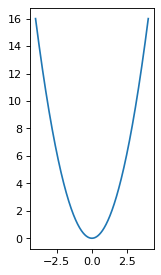

In [85]:
plt.figure(figsize=(2, 4), dpi=80)
build_plot_2d(pow2)
plt.show()

### hill

In [86]:
_hill = (1 - _x / 2 + _x ** 5 + _y ** 3) * sy.exp(-(_x ** 2 + _y ** 2))

hill, hill_grad = gen_from_symbolic(_hill, [_x, _y])

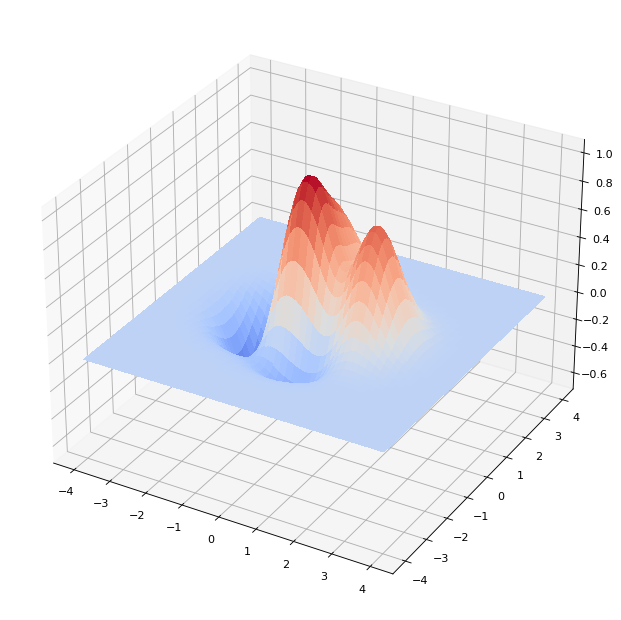

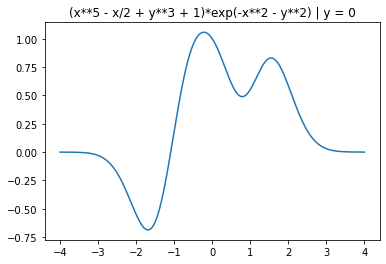

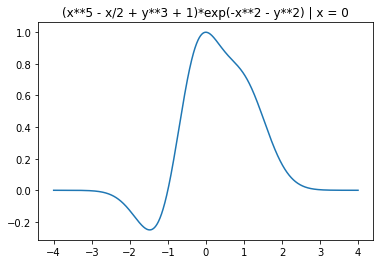

In [87]:
build_plot_3d(hill)
plt.show()

build_plot_2d(
    lambda x: hill(x, np.zeros(1000)),
)
plt.title(f'{_hill} | y = 0')
plt.show()

build_plot_2d(
    lambda y: hill(np.zeros(1000), y),
)
plt.title(f'{_hill} | x = 0')
plt.show()

## pow_pow

In [88]:
_pow_pow = 2 * _x ** 2 + 3 * _y ** 2

pow_pow, pow_pow_grad = gen_from_symbolic(_pow_pow, [_x, _y])

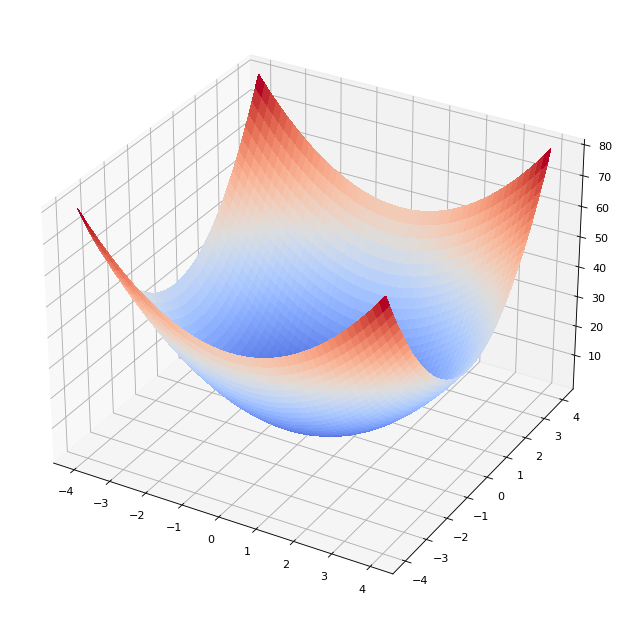

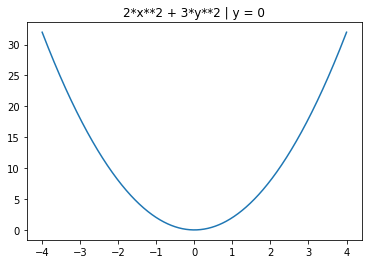

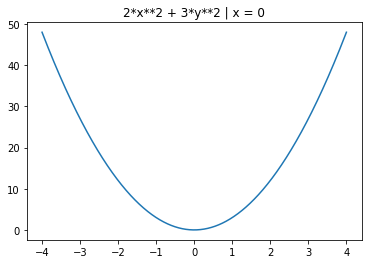

In [89]:
build_plot_3d(pow_pow)
plt.show()

build_plot_2d(
    lambda x: pow_pow(x, np.zeros(1000)),
)
plt.title(f'{_pow_pow} | y = 0')
plt.show()

build_plot_2d(
    lambda y: pow_pow(np.zeros(1000), y),
)
plt.title(f'{_pow_pow} | x = 0')
plt.show()

## Task 1

### Utils

In [90]:
def const_step_builder(x): return lambda **__: x

In [91]:
def make_experiment_pow2(step_func):
    res = gradient_descent(
        pow2,
        pow2_grad,
        step_func,
        -2.0
    )

    plt.figure(figsize=(2, 4), dpi=80)
    build_plot_2d(pow2)
    build_plot_2d(pow2, "r", xs=np.array(res))

    print(f'steps count: {len(res)}')
    print(f'answer: {res[-1]}')
    plt.show()

In [92]:
def uncurry(f): return lambda l: f(*l)


def make_experiment_3d(func, func_grad, step_func, x0, need_invert):
    def invert(f): return lambda *l: np.negative(f(*l))

    res = gradient_descent(
        uncurry(func),
        invert(uncurry(func_grad)) if need_invert else uncurry(func_grad),
        step_func,
        x0
    )
    res = np.array(res)

    build_plot_3d(func)

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    xs = res[:, 0]
    ys = res[:, 1]
    zs = func(xs, ys)
    ax.plot(xs, ys, zs, 'r', label='parametric curve')

    print(f'steps count: {len(res)}')
    print(f'answer: {res[-1]}')
    plt.show()

In [93]:
def make_experiment_hill(step_func, x0, need_invert=False):
    make_experiment_3d(hill, hill_grad, step_func, x0, need_invert)

In [94]:
def make_experiment_pow_pow(step_func, x0, need_invert=False):
    make_experiment_3d(pow_pow, pow_pow_grad, step_func, x0, need_invert)

### Const step gradient descent

#### От размера шага зависит качество градиентного спуска

* при `step = 0.1` мы спускаемся по более непрерывной траектории
* при `step = 0.9` мы спускаемся по рваной траектории
* при `step = 1` мы не можем прирастить аргумент достаточно близко для шага => спуска не происходит

steps count: 45
answer: -0.00010889035741470034


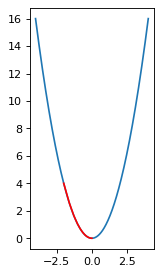

steps count: 45
answer: -0.00010889035741470075


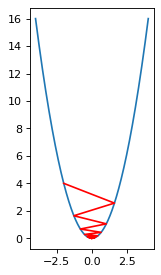

steps count: 2
answer: 2.0


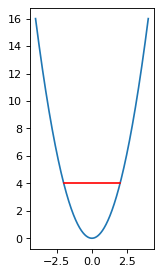

In [95]:
make_experiment_pow2(const_step_builder(0.1))
make_experiment_pow2(const_step_builder(0.9))
make_experiment_pow2(const_step_builder(1))
# make_experiment_pow2(const_step_builder(1.2)) # diverges

steps count: 22
answer: [-4.38739013e-05 -8.79609302e-09]


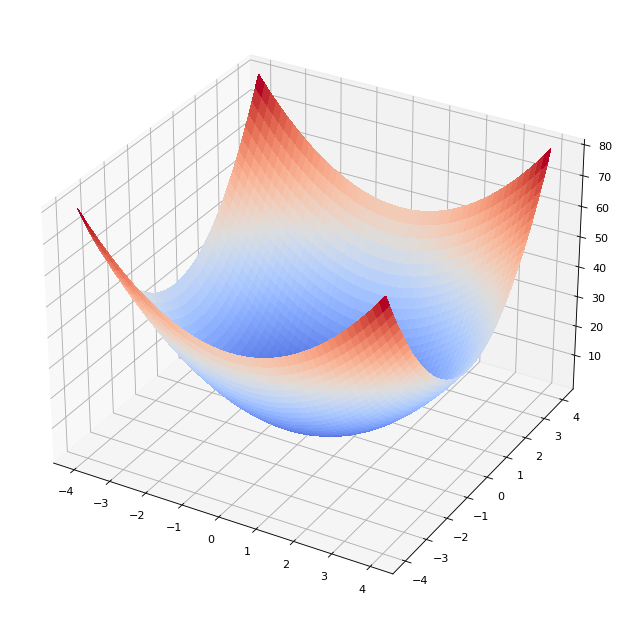

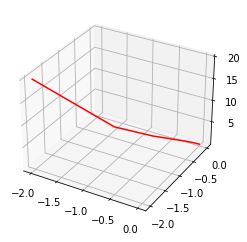

In [96]:
make_experiment_pow_pow(const_step_builder(0.1), np.array([-2, -2]))

steps count: 109
answer: [-1.68883889e+00 -3.03343865e-04]


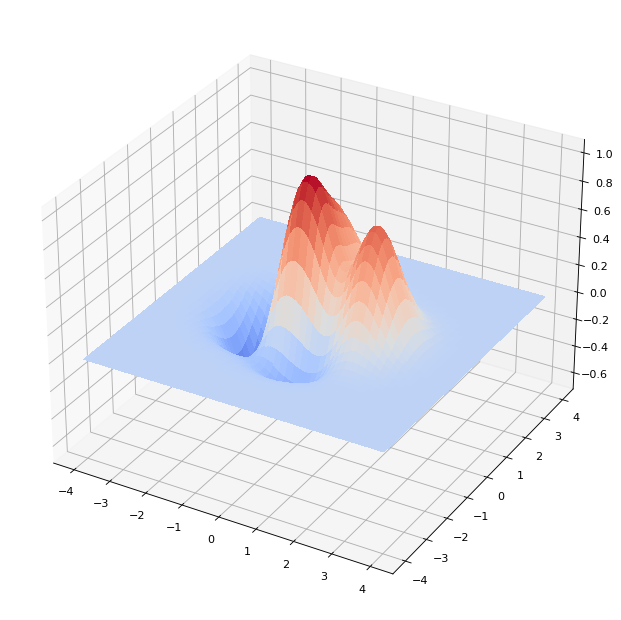

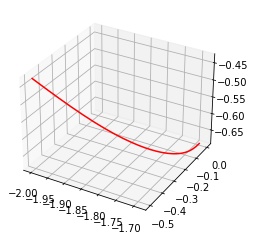

In [97]:
make_experiment_hill(const_step_builder(0.05), np.array([-2, -0.5]))

steps count: 83
answer: [-2.20081846e-01 -1.87025275e-04]


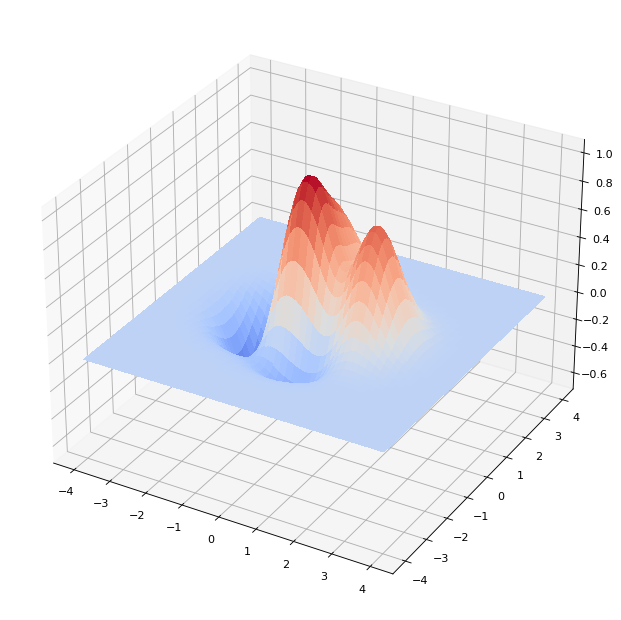

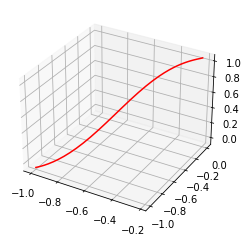

In [98]:
make_experiment_hill(const_step_builder(0.05), np.array([-1, -1]), True)

## Task 2

### Utils

* Экспоненциальная функция уменьшения шага приводит к лучшей сходимости (получена `1e-6` точность против `1e-5`) а также на двумерных функциях прослеживается более быстрая сходимость
* Может приводить к заметно худшим результатам по сравнению с константным шагом

In [99]:
def expr_step_builder(k, initial):
    return (
        lambda step, **__:
        initial * np.exp(-k * step)
    )

steps count: 147
answer: -0.21641788805833478


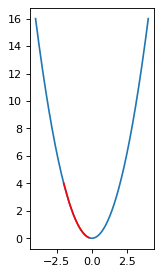

steps count: 9
answer: -3.881033837910954e-06


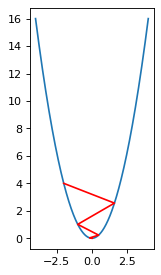

steps count: 2
answer: 2.0


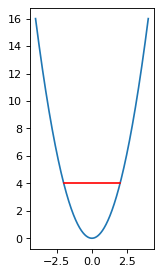

steps count: 12
answer: 9.24300239080326e-06


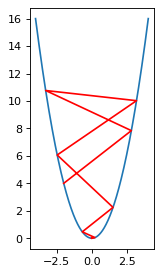

In [100]:
make_experiment_pow2(expr_step_builder(0.1, 0.1))
make_experiment_pow2(expr_step_builder(0.1, 0.9))
make_experiment_pow2(expr_step_builder(0.1, 1))
make_experiment_pow2(expr_step_builder(0.1, 1.2))

steps count: 9
answer: [-4.90448576e-07 -9.70258459e-07]


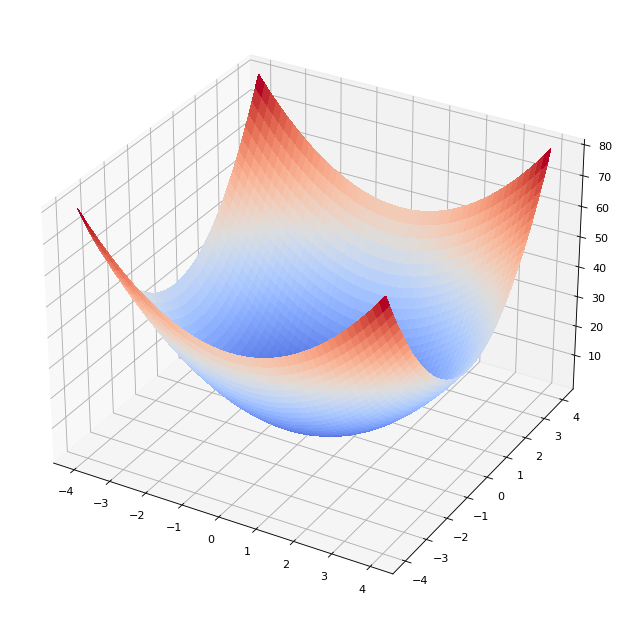

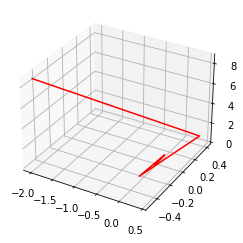

In [101]:
make_experiment_pow_pow(expr_step_builder(0.1, 0.3), np.array([-2, -0.5]))

steps count: 23
answer: [-1.68883889e+00 -2.50171414e-04]


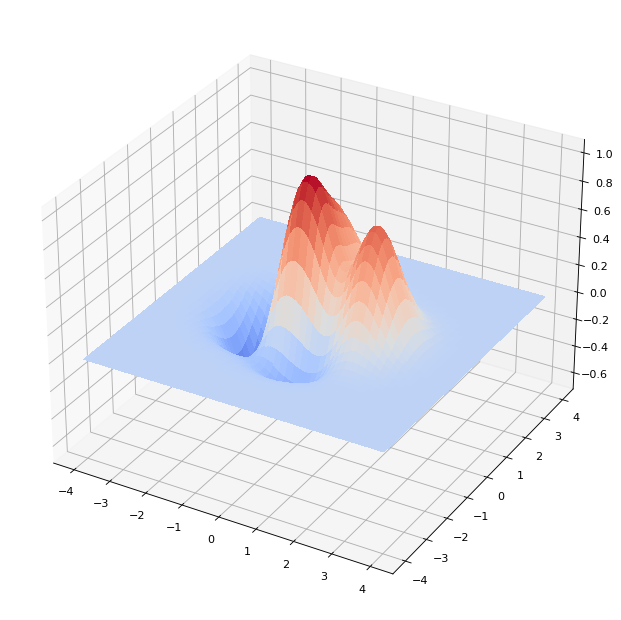

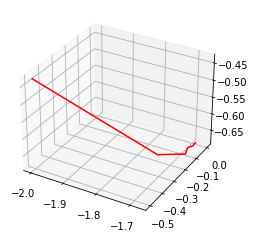

In [102]:
make_experiment_hill(expr_step_builder(0.1, 0.5), np.array([-2, -0.5]))

steps count: 10
answer: [-2.20042988e-01  1.88583825e-05]


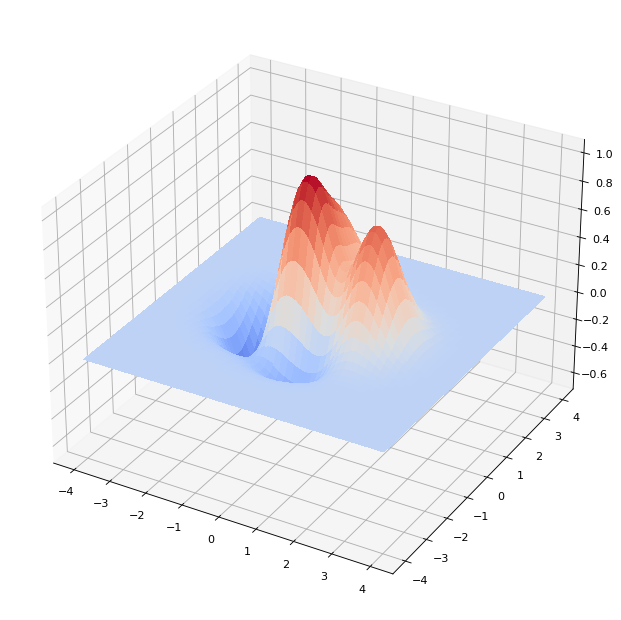

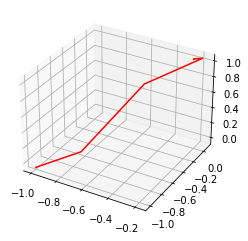

In [103]:
make_experiment_hill(expr_step_builder(0.1, 0.6), np.array([-1, -1]), True)

## Task 3

### Utils

In [104]:
def linear_step_builder(method):
    def step_func(func, grad, pred, **__):
        def pred_val(k): return func(pred - k * grad)

        left = 0.0
        right = linear_search(pred_val, left)
        return method(pred_val, left, right)

    return step_func

steps count: 3
answer: -4.4836107641728026e-08


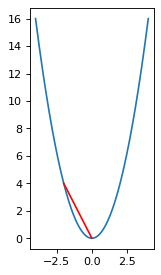

In [105]:
make_experiment_pow2(linear_step_builder(dichotomy))

steps count: 8
answer: [-8.14199655e-07  1.33313391e-06]


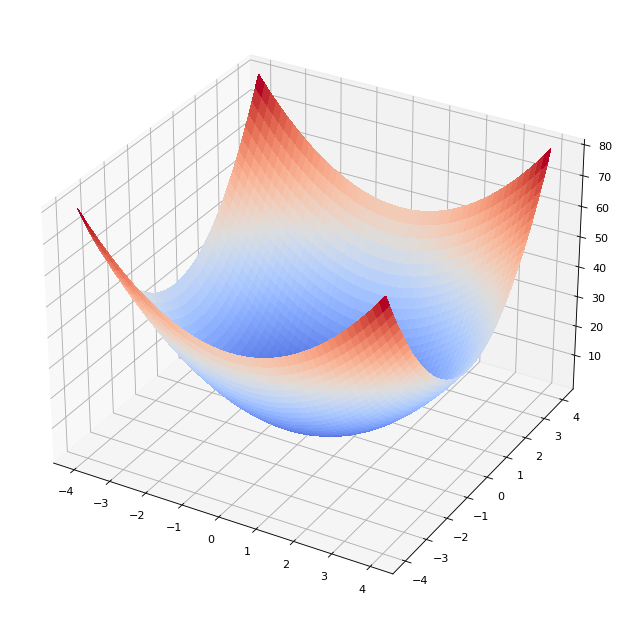

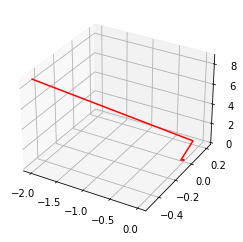

In [106]:
make_experiment_pow_pow(linear_step_builder(dichotomy), np.array([-2, -0.5]))

steps count: 13
answer: [-1.68884933e+00 -1.93906597e-05]


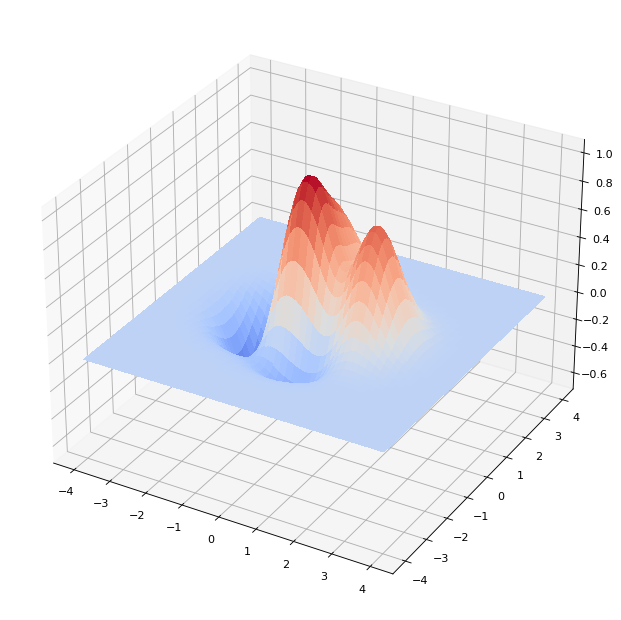

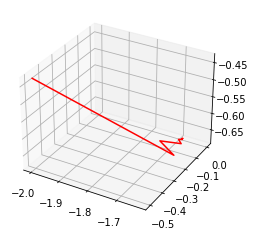

In [107]:
make_experiment_hill(linear_step_builder(dichotomy), np.array([-2, -0.5]))

steps count: 10
answer: [-2.20042988e-01  1.88583825e-05]


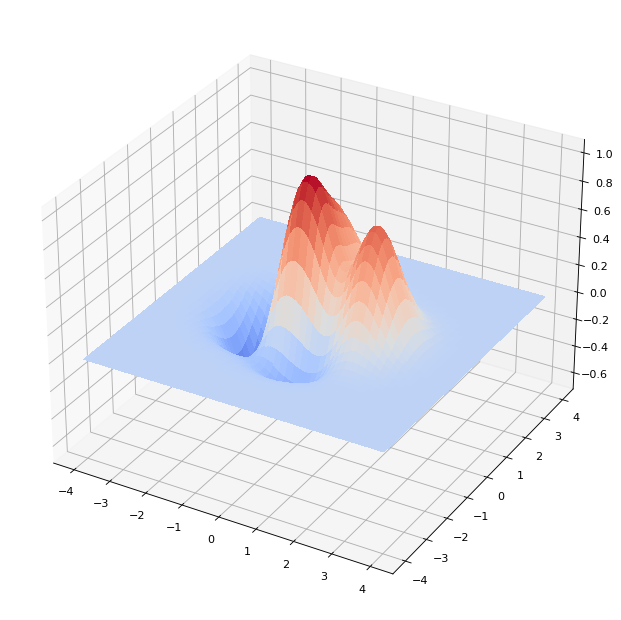

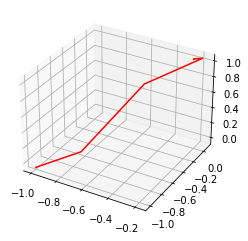

In [108]:
make_experiment_hill(expr_step_builder(0.1, 0.6), np.array([-1, -1]), True)

## Task 5

In [109]:
funct_w = _x ** 2 - _y ** 2 + _x * _y
w, w_grad = gen_from_symbolic(funct_w, [_x, _y])

### Функция "Седло"

* из точки (-4, -4) градиентный спуск быстро скатывается к минимуму
* из точки (0, 0), в которой градиент (0, 0) нет схождения к минимуму
* из точки (-eps, -eps) схожение к минимуму заметно медленнее

steps count: 375
answer: [  37707.84227147 -159732.9831468 ]


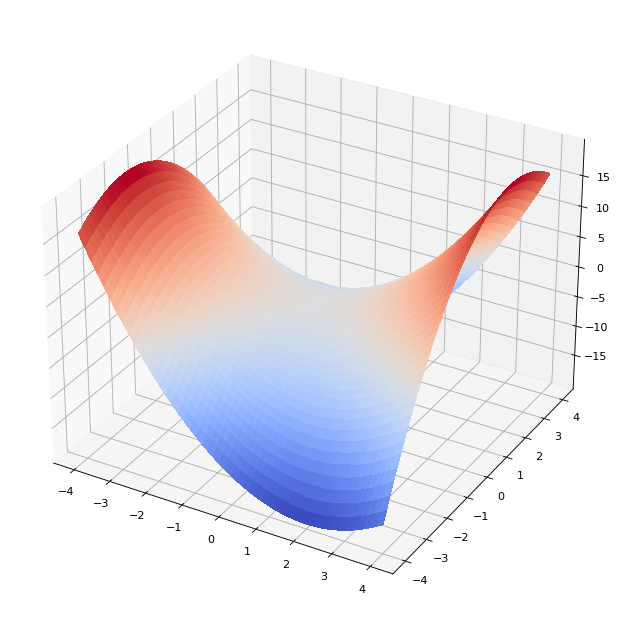

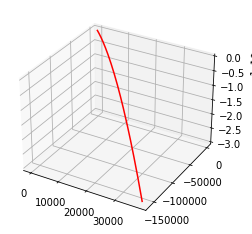

In [110]:
make_experiment_3d(w, w_grad, expr_step_builder(0.1, 0.6), np.array([-4, -4]), False)

steps count: 2
answer: [0. 0.]


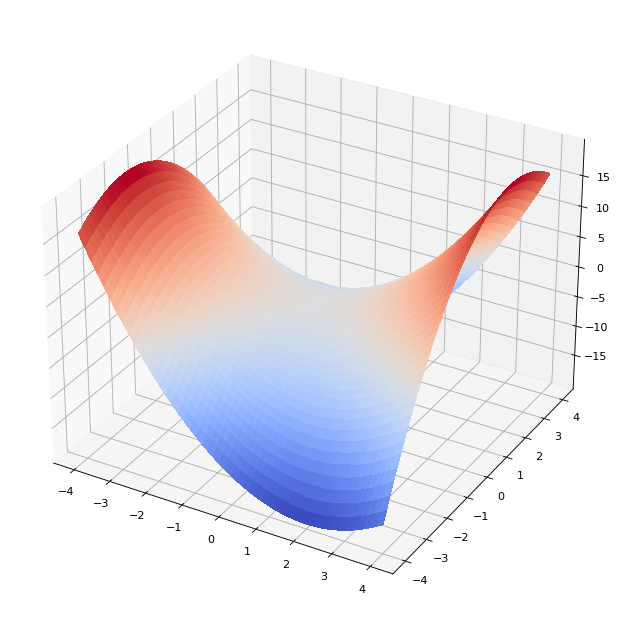

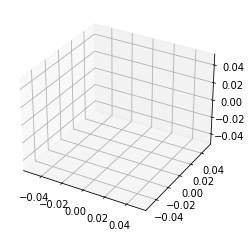

In [111]:
make_experiment_3d(w, w_grad, expr_step_builder(0.1, 0.6), np.array([0, 0]), False)

steps count: 364
answer: [  942.69605679 -3993.32457867]


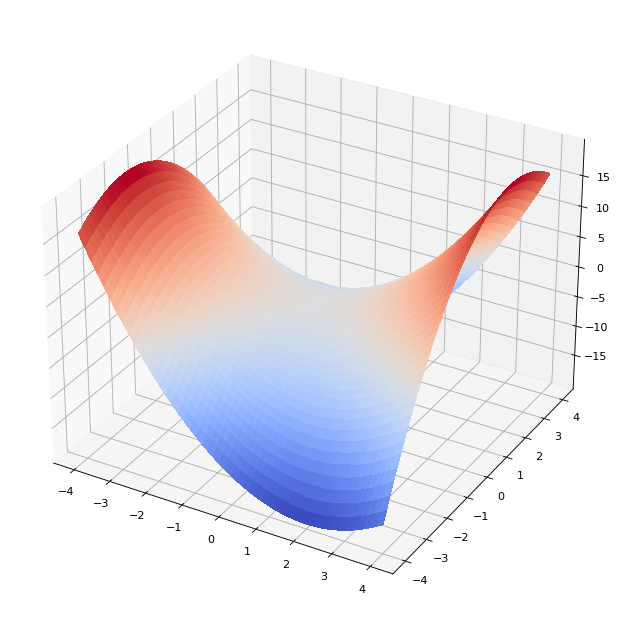

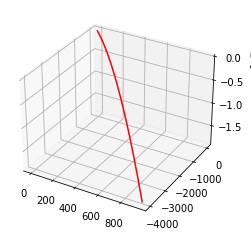

In [118]:
make_experiment_3d(w, w_grad, expr_step_builder(0.1, 0.6), np.array([-0.1, -0.1]), False)

In [112]:
funct_u = _x ** 2 + _y ** 2 - _x * _y
u, u_grad = gen_from_symbolic(funct_u, [_x, _y])

### Функция "Колодец"

* из точки (-4, -4) градиентный спуск быстро(порядка 10 шагов) скатывается к минимуму
* из точки (4, 4) градиентный спуск медленно(порядка 60 шагов) скатывается к минимуму

steps count: 10
answer: [-1.48416839e-06  1.48416839e-06]


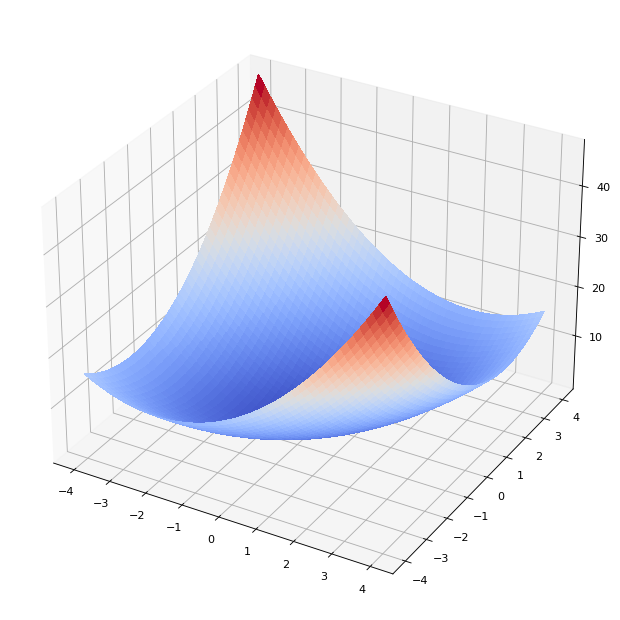

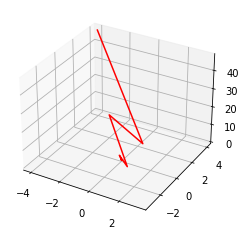

In [116]:
make_experiment_3d(u, u_grad, expr_step_builder(0.1, 0.6), np.array([-4, 4]), False)

steps count: 62
answer: [0.00175367 0.00175367]


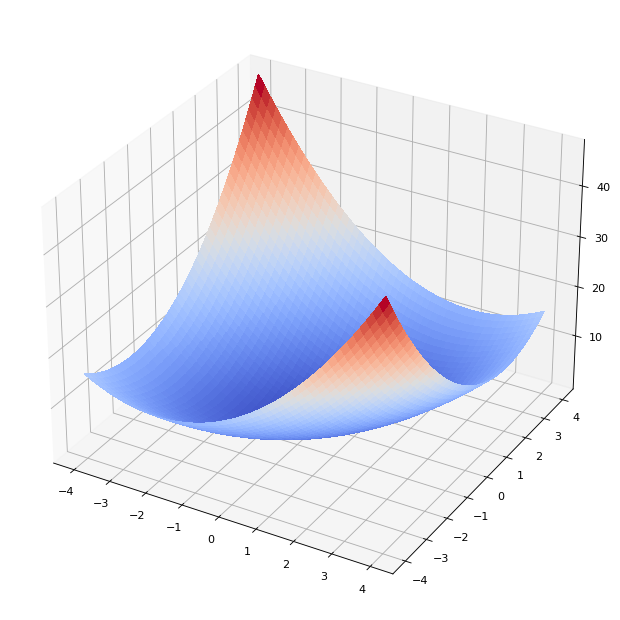

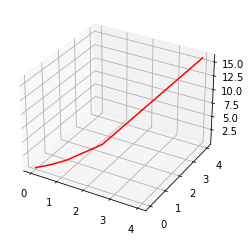

In [117]:
make_experiment_3d(u, u_grad, expr_step_builder(0.1, 0.6), np.array([4, 4]), False)

## Task 6

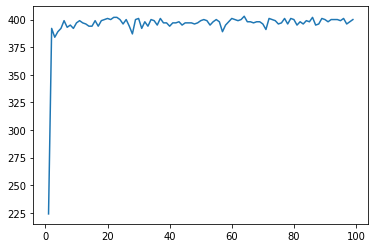

In [115]:
def do_experiment(n: int):
    func, func_grad = gen_qrt(n)
    try:
        res = gradient_descent(
            uncurry(func),
            uncurry(func_grad),
            expr_step_builder(0.1, 0.2),
            np.zeros(n)
        )
        return len(res)
    except _:
        return -1

_ns = np.array(range(1, 100))
_res = [do_experiment(n) for n in _ns]

plt.plot(_ns, _res)